In [21]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
client = MongoClient()
db = client.steam_capstone
collection = db.market
df = pd.DataFrame(list(collection.find({'app':730})))

In [4]:
df.head()

,_id,app,item_name,prices
0,5b62a5d58267aeaedbbb7daa,730,Glock-18 | Weasel (Battle-Scarred),"[{'date': 'Aug 19 2016 01: +0', 'median_sell_p..."
1,5b62a5d68267aeaedbbb7dab,730,PP-Bizon | Photic Zone (Minimal Wear),"[{'date': 'Feb 18 2016 01: +0', 'median_sell_p..."
2,5b62a5d68267aeaedbbb7dac,730,SSG 08 | Ghost Crusader (Field-Tested),"[{'date': 'Apr 28 2016 01: +0', 'median_sell_p..."
3,5b62a5d78267aeaedbbb7dad,730,Spectrum Case Key,"[{'date': 'Mar 16 2017 01: +0', 'median_sell_p..."
4,5b62a5d88267aeaedbbb7dae,730,Sticker | shroud (Foil) | Krakow 2017,"[{'date': 'Jul 07 2017 01: +0', 'median_sell_p..."


In [10]:
set([x[:x.find('|') - 1 if x.find('|') > 0 else None] for x in df.item_name])

{'AK-47',
 'AUG',
 'AWP',
 'Aces High Pin',
 'Atlanta 2017 Cache Souvenir Package',
 'Atlanta 2017 Challengers (Holo-Foil)',
 'Atlanta 2017 Cobblestone Souvenir Package',
 'Atlanta 2017 Dust II Souvenir Package',
 'Atlanta 2017 Legends (Holo-Foil)',
 'Atlanta 2017 Mirage Souvenir Package',
 'Atlanta 2017 Nuke Souvenir Package',
 'Atlanta 2017 Overpass Souvenir Package',
 'Atlanta 2017 Train Souvenir Package',
 'Audience Participation Parcel',
 'Autograph Capsule',
 'Baggage Pin',
 'Bestiary Capsule',
 'Bloodhound Pin',
 'Boston 2018 Attending Legends (Holo-Foil)',
 'Boston 2018 Attending Legends Autograph Capsule',
 'Boston 2018 Cache Souvenir Package',
 'Boston 2018 Cobblestone Souvenir Package',
 'Boston 2018 Inferno Souvenir Package',
 'Boston 2018 Legends (Holo-Foil)',
 'Boston 2018 Legends Autograph Capsule',
 'Boston 2018 Minor Challengers (Holo-Foil)',
 'Boston 2018 Minor Challengers Autograph Capsule',
 'Boston 2018 Minor Challengers with Flash Gaming (Holo-Foil)',
 'Boston 201

## CS:GO non-weapon items:
I split on '|' and the following strings are not stand alone in game items:
  * Starting with 'Sticker', ...
  * Ending in 'Pin', 'Case', 'Key', 'Capsule', ...

In [15]:
lst_col = 'prices'
df = pd.DataFrame({col:np.repeat(df[col].values, df[lst_col].str.len()) for col in df.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [16]:
df[['date','median_sell_price', 'quantity']] = pd.DataFrame(df.prices.values.tolist(), index= df.index)

In [18]:
df = df.drop(columns='prices')

In [19]:
df.head()

,_id,app,item_name,date,median_sell_price,quantity
0,5b62a5d58267aeaedbbb7daa,730,Glock-18 | Weasel (Battle-Scarred),Aug 19 2016 01: +0,6.193,135
1,5b62a5d58267aeaedbbb7daa,730,Glock-18 | Weasel (Battle-Scarred),Aug 20 2016 01: +0,5.103,166
2,5b62a5d58267aeaedbbb7daa,730,Glock-18 | Weasel (Battle-Scarred),Aug 21 2016 01: +0,4.721,142
3,5b62a5d58267aeaedbbb7daa,730,Glock-18 | Weasel (Battle-Scarred),Aug 22 2016 01: +0,4.302,98
4,5b62a5d58267aeaedbbb7daa,730,Glock-18 | Weasel (Battle-Scarred),Aug 23 2016 01: +0,3.898,125


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226099 entries, 0 to 11226098
Data columns (total 6 columns):
_id                  object
app                  int64
item_name            object
date                 object
median_sell_price    float64
quantity             object
dtypes: float64(1), int64(1), object(4)
memory usage: 513.9+ MB


In [29]:
df_glock = df[(df.item_name=='Glock-18 | Weasel (Battle-Scarred)')]

In [35]:
df_plot_glock = df_glock[[x[-11:-7] == '2017' for x in df_glock.date]]

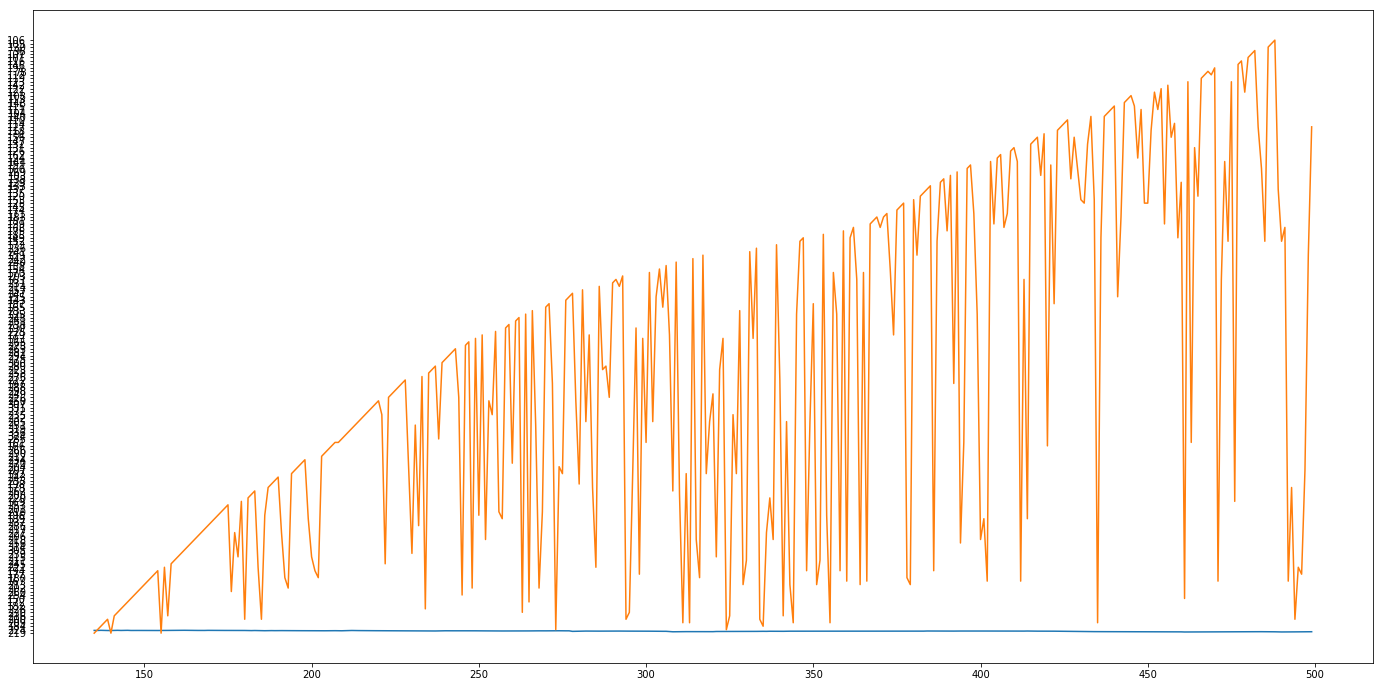

In [38]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(df_plot_glock.median_sell_price)
ax.plot(df_plot_glock.quantity)

In [39]:
glock_price = df_plot_glock.median_sell_price
glock_quant = df_plot_glock.quantity.values

In [51]:
glock_quant = list(map(int, glock_quant))

In [52]:
glock_price_standard = [(x-min(glock_price))/(max(glock_price) - min(glock_price)) for x in glock_price]
glock_quant_standard = [(x-min(glock_quant))/(max(glock_quant) - min(glock_quant)) for x in glock_quant]

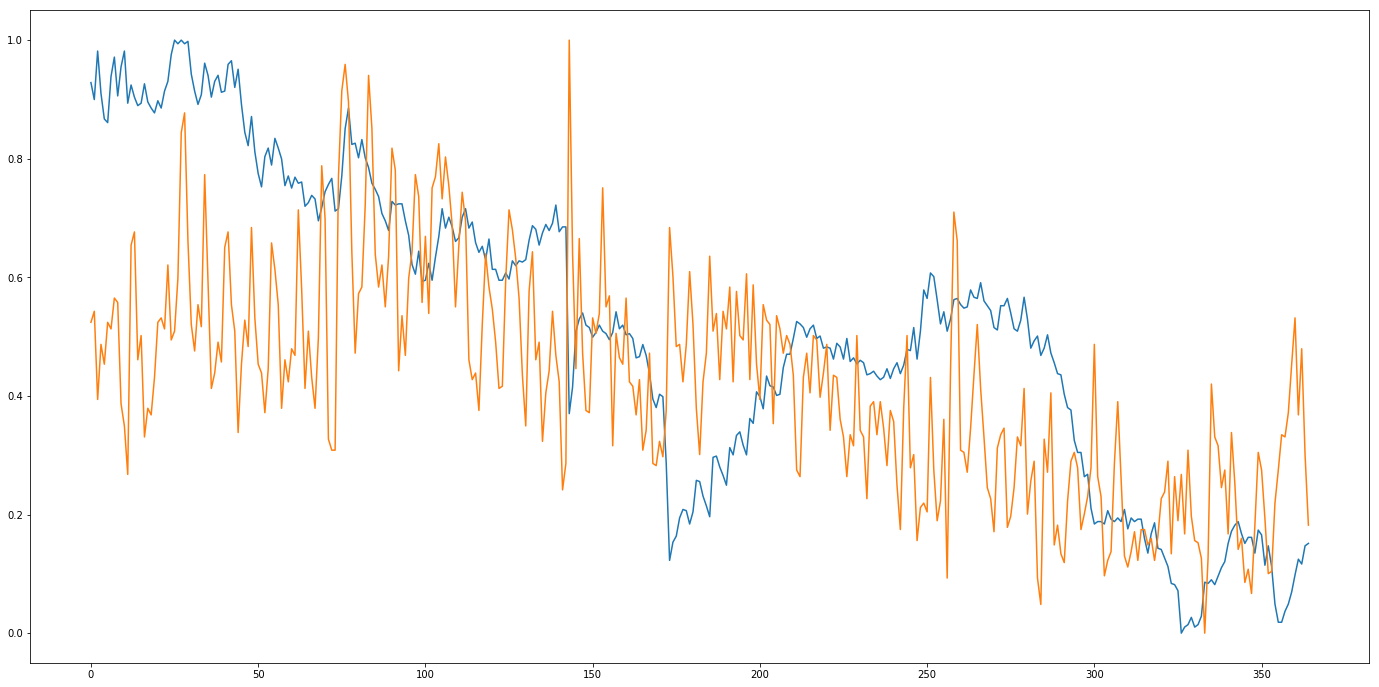

In [53]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(glock_price_standard)
ax.plot(glock_quant_standard)